In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#reading the csv file as a link to github
url = '/Users/dedeepya/Downloads/sem_5/fogandedge/cyberbullying/Suspicious Communication on Social Platforms.csv'
df = pd.read_csv(url)

#looking at the first five rows using .head() function
df.head()

#importing natural language Toolkit - A tool to preprocesses/clean text 
import nltk

In [50]:
#Checking that the latest nltk version is installed in the users local computer 
#Warning: install all the libraries required for this project
nltk.__version__

'3.9.1'

# Preprocessing

In [51]:
df.shape

(20001, 2)

In [52]:
#converting all missing values in tagging column into NaN
#example: converting None,NotAvailable,ValueMissing,etc into Nan
df=df[pd.to_numeric(df['tagging'], errors='coerce').notnull()]

In [53]:
#Droping all rows that contain Nan value 
df = df.dropna(axis=0)

In [54]:
#Since the shape is the same there are no missing valus in our dataset
df.shape

(20001, 2)

In [55]:
import string
from nltk import pos_tag#pos_tag is a tool that tags the part of speech to the word(POS = Part of Speech)
#example: tagging the word 'drinking' as verb

#function for removing punctuations
def tokenize_remove_punctuation(text):
  clean_text = []         #creaating an empty list to store the cleaned text
  text = text.split(" ")  #spliting all words in a sentence separated by " " and storing them in a list named 'text'
  for word in text:
    word = list(word)  #spliting all words into alphabets
    new_word = []      #creaating an empty list to store the new word after removing puntuations
    
    # spliting the words into alphabets is used because it will convert words like 'reading?' into 'reading'
    for c in word:
      if c not in string.punctuation:     #string.puntuation is a list og all puntuation marks , example :@!$%&?, etc.
        new_word.append(c)
      word = "".join(new_word)  #joing the alphabets to create the word after removing all puntuations
    clean_text.append(word)     #storing the word in the list named 'clean_text' to create the list of words in the sentence
  return clean_text


In [56]:
# using a sample sentence to see whether the funtion works well or not 
# NOTE: We have only created the functions till now. We haven't done anythong with our dataset till now.
trial_text = tokenize_remove_punctuation("hello @anyone reading? wt is the name of am in that this  ??!@")
trial_text

['hello',
 'anyone',
 'reading',
 'wt',
 'is',
 'the',
 'name',
 'of',
 'am',
 'in',
 'that',
 'this',
 [],
 '']

In [57]:
import nltk
#downloads the list of stopwords
nltk.download('stopwords')

#'stopwords' is a list of words that have nearly no value in the sentence
#example : 'I am a boy' is converted into 'boy'
#here words like 'I', 'am', 'a' ;these words have very less comtribution to the sentence

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dedeepya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
#storing all the stopwords in the list named 'stopwords' 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')  #storing only english stopwords , there are stopwords for other language also such as chinese and french

# Function to remove all the stopwords from the sentence
def remove_stopwords(text):
  clean_text = []
  for word in text:
    if word not in stopwords:
      clean_text.append(word)
  return clean_text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dedeepya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
# using a sample sentence to see whether the funtion works well or not
remove_stopwords(trial_text)

['hello', 'anyone', 'reading', 'wt', 'name', [], '']

In [60]:
#tagging all the words according o their part of speech
def pos_tagging(text):
    try:
        tagged = nltk.pos_tag(text)
        return tagged
    except Exception as e:
        print(e)

In [61]:
from nltk.corpus import wordnet

#wordnet is a tool that reads that reads the tagging and returns the part of speech 
def get_wordnet(pos_tag):
  if pos_tag.startswith('J'):
    return wordnet.ADJ
  elif pos_tag.startswith('V'):
    return wordnet.VERB
  elif pos_tag.startswith('N'):
    return wordnet.NOUN
  elif pos_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN

In [62]:
from nltk.stem import WordNetLemmatizer
#WordLemmatizer is a tool that converts word into root word
#Example: historical(word) is converted into history(root-word)

#Now we will create a function that uses all the functions that we have created above

def clean_text(text):
  text = str(text)
  #Converting text to lower-case
  text = text.lower()
  #tokenize and remove punctuations from the text
  text = tokenize_remove_punctuation(text)
  #remove words containing numericals
  text = [word for word in text if not any(c.isdigit() for c in word)]
  #remove stopwords
  text = remove_stopwords(text)
  #remove empty tokens
  text = [ t for t in text if len(t) > 0]
  #pos tagging
  pos_tags = pos_tagging(text)
  #Lemmatize text
  text = [WordNetLemmatizer().lemmatize(t[0],get_wordnet(t[1])) for t in pos_tags]
  #remove words with only one letter
  text = [ t for t in text if len(t)>1]
  #join all words
  text = " ".join(text)
  return text

In [63]:
#don't know what is 'averaged_perceptron_tagger'
#don't know why devansh downloaded it 
nltk.download('averaged_perceptron_tagger')

#Downloading the wordnet tool
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dedeepya/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dedeepya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [64]:
import spacy

# Load spaCy's small English model
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

print(clean_text("What is y0ur name? THis is a cat!! 12?"))


['cat']


In [65]:
import spacy

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    doc = nlp(text)
    cleaned = [
        token.lemma_                     # Get the base form
        for token in doc
        if token.is_alpha               # Keep only words (remove numbers/punctuations)
        and not token.is_stop          # Remove stopwords like "is", "a", etc.
        and len(token) > 1             # Remove short 1-letter words
    ]
    return cleaned

print(clean_text("What is y0ur name? THis is a cat!! 12?"))

['cat']


<Axes: title={'center': 'Ratio of observations'}, xlabel='tagging'>

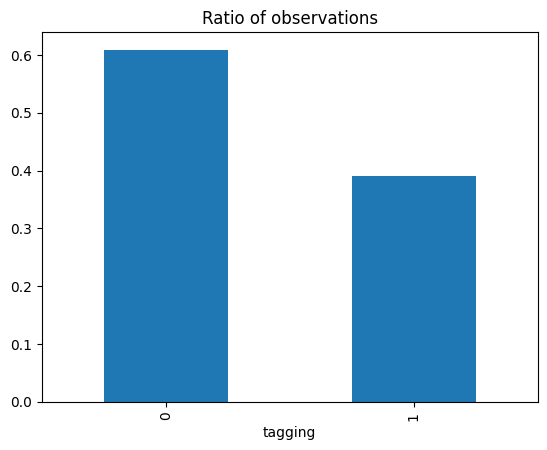

In [66]:
df['tagging'].value_counts(normalize=True).plot(kind='bar', title='Ratio of observations')
#ploting number of '1' and '0' in the 'tagging' colomn of the dataset

#As we can see the difference in number of '1' and '0' is not very large hence we call it as a balanced dataset 
#NOTE:It's very important to provide a balanced dataset for creating the model

In [67]:
#This line code converts floating numericals into integer numeric
#example: converting 1.0, 1.00, etc into integer 1
#example: converting 0.0, 0.00, etc into integer 0

df['tagging']=df['tagging'].astype(str).astype(int)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  20001 non-null  object
 1   tagging   20001 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [69]:
df.shape

(20001, 2)

In [70]:
#reseting the index of rows
# Index gets unordered if we drop some rows in our dataset(Example while using dropna() function)
df.reset_index(inplace = True, drop = True)

In [71]:
#this line of code will now be used to pply the functions on each sentences in the 'comments' column
#This will take time as it will use the 'clean_text' function on all the sentences in our dataset
#the .map() function applies the function at each sentences in the 'comments' column
df['Processed_Comment'] = df['comments'].map(clean_text)

In [72]:
#Splitting dataset for training and testing(80:20)

from sklearn.model_selection import train_test_split
#train_test_split is a funtion that splits dataset into two parts 
#80%(for training the model) and 20%(for testing the model)
#This function returns 4 values 
# 1 'Processed_comment' for training
# 2 'Processed_comment' for testing
# 3 'tagging' for training
# 3 'tagging' for testing
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Comment'], 
                                                    df['tagging'], 
                                                    random_state=42,test_size=0.20)

#random state is used to shuffle the dataset
#test_size=0.20 means that 20% of the dataset is to be allocated for testing of the model

In [73]:
# If clean_text() returns list of tokens per sentence
X_train = [' '.join(tokens) for tokens in X_train]
X_test = [' '.join(tokens) for tokens in X_test]

# Now vectorize
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
X_train_vec = count_vector.fit_transform(X_train)
X_test_vec = count_vector.transform(X_test)


In [74]:
#gives the number of columns in the vectorized table 
len(count_vector.vocabulary_)

11712

In [75]:
#Importing all the terms by which we get accuracy of our model
#NOTE:we haven't trained our model yet 
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
#creates a confusion matrix
from sklearn.metrics import confusion_matrix
data =[] #Empty list created to add the accuracy terms of each model that we are going to train 

In [76]:
#importing all empty models
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

#GridSearchCV is a funtion which uses maths to find out the parameters for our dataset
from sklearn.model_selection import GridSearchCV

In [78]:
#Creating a dictionary of all the possible parameters of each ML model
model_params = {
    'LinearSVC': {
        'model': LinearSVC(max_iter=1000000,random_state=42),
        'params' : {
            'C': [0.1,1,5,10,20],
        }  
    },
    'MultinomialNB': {
        'model': MultinomialNB(),
        'params' : {
            'alpha': np.linspace(0.5, 1.5, 6),
            'fit_prior': [True, False],
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(random_state=42, multi_class='ovr',max_iter=1000000),
        'params': {
            'C': [1,5,10],
            'solver': ['newton-cg', 'lbfgs', 'liblinear'],
        }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(p=2 ),
        'params' : {
            'n_neighbors': [5,9,11,23],
              'weights' : ['uniform', 'distance'],
              'metric' : ['euclidean', 'manhattan', 'minkowski'],
        }
    }
}

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert text into bag-of-words numeric vectors
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_vec, y_train)  # 👈 Use vectorized input here
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

# Create DataFrame **outside the loop**
df4 = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df4


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn

,model,best_score,best_params
0,LinearSVC,0.820750,{'C': 5}
1,MultinomialNB,0.760813,"{'alpha': 0.5, 'fit_prior': True}"
2,logistic_regression,0.821688,"{'C': 10, 'solver': 'lbfgs'}"
3,KNeighborsClassifier,0.776313,"{'metric': 'euclidean', 'n_neighbors': 23, 'we..."


# KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier

# Use the best parameters from GridSearchCV
model1 = KNeighborsClassifier(n_neighbors=23, metric='euclidean', weights='distance')

# Train on the vectorized data
model1.fit(X_train_vec, y_train)


,n_neighbors,23
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [81]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Make predictions
predictions_test = model1.predict(X_test_vec)     # ✅ Use vectorized test set
predictions_train = model1.predict(X_train_vec)   # already correct

# Create temp list
temp = ['KNeighborsClassifier']
temp.append(accuracy_score(y_train, predictions_train))     # ✅ correct order
temp.append(recall_score(y_train, predictions_train))
temp.append(f1_score(y_train, predictions_train))
temp.append(precision_score(y_train, predictions_train))
temp.append(accuracy_score(y_test, predictions_test))
temp.append(recall_score(y_test, predictions_test))
temp.append(f1_score(y_test, predictions_test))
temp.append(precision_score(y_test, predictions_test))

# Append to data list
data.append(temp)

In [82]:
#Creating confusion matrix of our model
confusion = confusion_matrix(predictions_test,y_test)
print(confusion)

[[1654   85]
 [ 770 1492]]


# Logistic Regression

In [83]:
model2 = LogisticRegression(C=10, random_state=42, solver='lbfgs', multi_class='ovr', max_iter=1000000)
model2.fit(X_train_vec, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,10
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000000
,multi_class,'ovr'


In [84]:
# Predict
predictions_train = model2.predict(X_train_vec)
predictions_test = model2.predict(X_test_vec)

# Store metrics correctly
temp = ['LogisticRegression']
temp.append(accuracy_score(y_train, predictions_train))
temp.append(recall_score(y_train, predictions_train))
temp.append(f1_score(y_train, predictions_train))
temp.append(precision_score(y_train, predictions_train))
temp.append(accuracy_score(y_test, predictions_test))
temp.append(recall_score(y_test, predictions_test))
temp.append(f1_score(y_test, predictions_test))
temp.append(precision_score(y_test, predictions_test))

# Append to data
data.append(temp)

In [85]:
confusion = confusion_matrix(predictions_test,y_test)
print(confusion)

[[1967  191]
 [ 457 1386]]


# Naive Bayes

In [86]:
model3 = MultinomialNB(alpha=0.5, fit_prior=True)
model3.fit(X_train_vec, y_train)

,alpha,0.5
,force_alpha,True
,fit_prior,True
,class_prior,None


In [87]:
# Predictions
predictions_train = model3.predict(X_train_vec)
predictions_test = model3.predict(X_test_vec)

# Metrics storage
temp = ['MultinomialNB']
temp.append(accuracy_score(y_train, predictions_train))
temp.append(recall_score(y_train, predictions_train))
temp.append(f1_score(y_train, predictions_train))
temp.append(precision_score(y_train, predictions_train))
temp.append(accuracy_score(y_test, predictions_test))
temp.append(recall_score(y_test, predictions_test))
temp.append(f1_score(y_test, predictions_test))
temp.append(precision_score(y_test, predictions_test))

# Append results
data.append(temp)

In [88]:
confusion = confusion_matrix(predictions_test,y_test)
print(confusion)

[[1974  410]
 [ 450 1167]]


# Linear SVC

In [89]:
#Same we do for Linear SVC model and store the accuracy terms in 'data' list
model4 = LinearSVC(C = 1, max_iter=1000000,random_state=42)
model4.fit(X_train_vec, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,42


In [90]:
predictions_test = model4.predict(X_test_vec)
predictions_train = model4.predict(X_train_vec)
temp = ['LinearSVC']
temp.append(accuracy_score(y_train, predictions_train))
temp.append(recall_score(y_train, predictions_train))
temp.append(f1_score(y_train, predictions_train))
temp.append(precision_score(y_train, predictions_train))
temp.append(accuracy_score(y_test, predictions_test))
temp.append(recall_score(y_test, predictions_test))
temp.append(f1_score(y_test, predictions_test))
temp.append(precision_score(y_test, predictions_test))
data.append(temp)


In [91]:
confusion = confusion_matrix(predictions_test,y_test)
print(confusion)

[[1947  184]
 [ 477 1393]]


# Summary

In [92]:
#Creating a table of all accuracy terms of each trained ML models
result = pd.DataFrame(data, columns = ['Algorithm','Accuracy Score : Train', 'Recall Score : Train','F1-Score :Train','Precision Score :Train','Accuracy Score : Test', 'Recall Score : Test','F1-Score : Test','Precision Score : Test'])
result.reset_index(drop=True, inplace=True)

In [93]:
result

,Algorithm,Accuracy Score : Train,Recall Score : Train,F1-Score :Train,Precision Score :Train,Accuracy Score : Test,Recall Score : Test,F1-Score : Test,Precision Score : Test
0,KNeighborsClassifier,0.990812,0.991994,0.988275,0.984584,0.786303,0.946100,0.777286,0.659593
1,LogisticRegression,0.950750,0.934828,0.936778,0.938736,0.838040,0.878884,0.810526,0.752035
2,MultinomialNB,0.876812,0.823379,0.839168,0.855574,0.785054,0.740013,0.730745,0.721707
3,LinearSVC,0.950688,0.935308,0.936733,0.938163,0.834791,0.883323,0.808239,0.744920


# Saving models in .pkl file

In [108]:
import pickle
#pickle is a tool to create .pkl files 
#These .pkl files are trained models which will be used to predict the input text is a cyberbulling or not 

In [109]:
import pickle

# Save the trained Logistic Regression model
with open("cyberbullying_model.pkl", "wb") as f:
    pickle.dump(model2, f)

# Save the vectorizer used during training
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(count_vector, f)  # or tfidf_vector, if you used TF-IDF


In [110]:
#Saves the trained LinearSVC model
pickle_out = open("LinearSVC.pkl","wb")
pickle.dump(model4, pickle_out)
pickle_out.close()

In [111]:
#Saves the trained Naive Bayes model
pickle_out = open("MultinomialNB.pkl","wb")
pickle.dump(model3, pickle_out)
pickle_out.close()

In [112]:
#Saves the trained Logistic Regression model
pickle_out = open("LogisticRegression.pkl","wb")
pickle.dump(model2, pickle_out)
pickle_out.close()

In [107]:
#Saves the trained KNN model
pickle_out = open("KNeighborsClassifier.pkl","wb")
pickle.dump(model1, pickle_out)
pickle_out.close()